In [ ]:
# taken from some local scratch code
# will highlight differences or polar residues

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from Bio import SeqIO
import os

In [12]:
def pad_string(s, length):
    return s.ljust(length)

def fasta_to_dict(input_fasta):
    # make seq dict
    seq_dict = {}
    for record in SeqIO.parse(input_fasta, "fasta"):
        header = record.id  # Extract the header (up to the first space in the description)
        sequence = str(record.seq)  # Convert the sequence object to a string
        seq_dict[header] = sequence
    return seq_dict

# new version for fasta file
def render_colored_strings(input_file, reference, order_lst, color_dict, output_file):
    seq_dict = fasta_to_dict(input_file)
    
    # Read the strings from the input file
    # old list of lines

    #setup starting index
    labels = list(seq_dict.keys())
    max_label = max(len(s) for s in labels)
    start_index = max_label + 2

    # Get the reference string (first line)
    # make a list of sequences with labels at the front, start with reference

    ref_seq = reference.ljust(start_index) + seq_dict[reference]
    #seq_lst.append(ref_seq)
    #label_lst.append(reference)
    
    seq_lst = []
    label_lst = []
    for key in order_lst:
        seq = key.ljust(start_index) + seq_dict[key]
        seq_lst.append(seq)
        label_lst.append(key)

    # Font settings (using a monospace font)
    font_family = "Courier New"  # Use "Liberation Mono" as an alternative
    font_size = 7  # Increase font size for better readability

    # Calculate figure size
    char_width = 0.1  # Adjust spacing based on font and rendering
    char_height = 0.15
    width = max(len(seq) for seq in seq_lst) * char_width
    height = len(seq_lst) * char_height

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(width, height))
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.axis("off")  # Hide axes

    # Draw each character
    for line_index, line in enumerate(seq_lst):
        y = height - (line_index + 1) * char_height  # Invert y-axis (matplotlib starts from bottom)
        for char_index, char in enumerate(line):
            x = char_index * char_width
            
            color = color_dict[label_lst[line_index]]
            
            # Render text
            ax.text(x, y, char, fontsize=font_size, fontfamily=font_family, verticalalignment="bottom", color="black", zorder=1)
            
            # do nothing for the labels
            if char_index < max_label or char == "-":
                continue
            
            # Highlight different characters
            if char_index < len(ref_seq) and char != ref_seq[char_index]:
                rect = patches.Rectangle((x, y), char_width, char_height, linewidth=0, edgecolor=None, facecolor=color, zorder=0)
                ax.add_patch(rect)
            """

            # Polar residues: positive
            if char_index < len(reference) and char in ['H','K','R']:
                rect = patches.Rectangle((x, y), char_width, char_height, linewidth=0, edgecolor=None, facecolor="#6BB3FC")
                ax.add_patch(rect)

            # Polar residues: negative
            if char_index < len(reference) and char in ['D','E']:
                rect = patches.Rectangle((x, y), char_width, char_height, linewidth=0, edgecolor=None, facecolor="#FB5A5B")
                ax.add_patch(rect)
            """
            
            #ax.text(x, y, char, fontsize=font_size, fontfamily=font_family, verticalalignment="bottom", color="black", zorder=1)

    # Save the figure as a high-quality vector file
    if output_file.endswith(".pdf"):
        plt.savefig(output_file, format="pdf", bbox_inches="tight")
    elif output_file.endswith(".svg"):
        plt.savefig(output_file, format="svg", bbox_inches="tight")
    else:
        raise ValueError("Unsupported file format. Use .pdf or .svg")

    print(f"Output saved as {output_file}")



Output saved as img/k3_orthologs.pdf


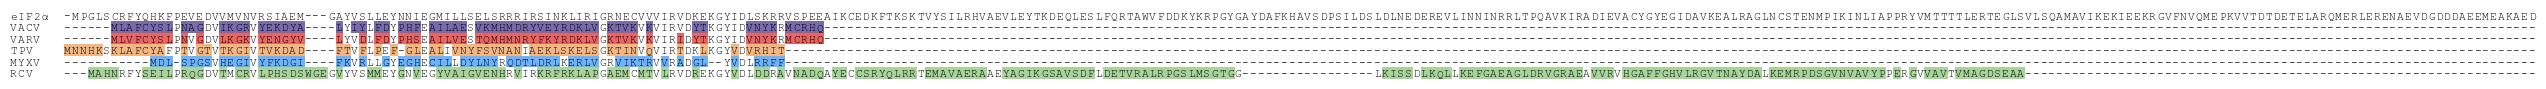

In [13]:
input_file = 'k3-orthologs.aln.fa'
img_dir = 'img/'
output_img = 'k3_orthologs.pdf'
out_path = os.path.join(img_dir, output_img)

color_dict = {
    'eIF2α':'gray',
    'VACV':'#786BAC',
    'VARV':'#E86562',
    'TPV':'#F4B681',
    'MYXV':'#6BB3FC',
    'RCV':'#A8D39B'
}

order_lst = list(color_dict.keys())

render_colored_strings(
    input_file,
    reference = 'eIF2α',
    order_lst = order_lst,
    color_dict = color_dict,
    output_file = out_path
)


Output saved as output_test.pdf


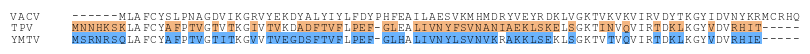

In [ ]:
# Example usage

input_fasta = 'vacv-tpv-ymtv_k3.aln.fa'
img_dir = "~/scratch/250212_tpv-ymtv-rothenburg/img/"
output_file = "output_test.pdf"  # Use "output.svg" for an SVG version
out_path = os.path.join(img_dir, output_file)

render_colored_strings(
    input_fasta, 
    reference='VACV', 
    color_dict=color_dict, 
    output_file=output_file
)

Output saved as tpv-ref.pdf


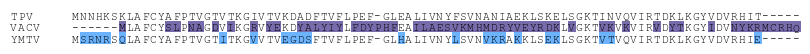

In [24]:
input_fasta = 'vacv-tpv-ymtv_k3.aln.fa'
img_dir = "~/scratch/250212_tpv-ymtv-rothenburg/img/"
output_file = "tpv-ref.pdf"  # Use "output.svg" for an SVG version
out_path = os.path.join(img_dir, output_file)

render_colored_strings(
    input_fasta, 
    reference='TPV', 
    color_dict=color_dict, 
    output_file=output_file
)

Output saved as output.pdf


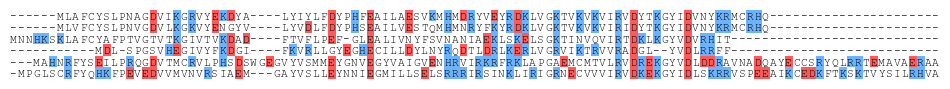

In [ ]:
def render_colored_strings(input_file, output_file):
    # Read the strings from the input file
    with open(input_file, 'r') as f:
        lines = [line.strip() for line in f.readlines()]

    # Get the reference string (first line)
    reference = lines[0]

    # Font settings (using a monospace font)
    font_family = "Courier New"  # Use "Liberation Mono" as an alternative
    font_size = 8  # Increase font size for better readability

    # Calculate figure size
    char_width = 0.1  # Adjust spacing based on font and rendering
    char_height = 0.15
    width = max(len(line) for line in lines) * char_width
    height = len(lines) * char_height

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(width, height))
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.axis("off")  # Hide axes

    # Draw each character
    for line_index, line in enumerate(lines):
        y = height - (line_index + 1) * char_height  # Invert y-axis (matplotlib starts from bottom)
        for char_index, char in enumerate(line):
            x = char_index * char_width

            """
            # Highlight different characters
            if char_index < len(reference) and char != reference[char_index]:
                rect = patches.Rectangle((x, y), char_width, char_height, linewidth=0, edgecolor=None, facecolor="red")
                ax.add_patch(rect)
            """

            # Polar residues: positive
            if char_index < len(reference) and char in ['H','K','R']:
                rect = patches.Rectangle((x, y), char_width, char_height, linewidth=0, edgecolor=None, facecolor="#6BB3FC")
                ax.add_patch(rect)

            # Polar residues: negative
            if char_index < len(reference) and char in ['D','E']:
                rect = patches.Rectangle((x, y), char_width, char_height, linewidth=0, edgecolor=None, facecolor="#FB5A5B")
                ax.add_patch(rect)

            # Render text
            ax.text(x, y, char, fontsize=font_size, fontfamily=font_family, verticalalignment="bottom", color="black")

    # Save the figure as a high-quality vector file
    if output_file.endswith(".pdf"):
        plt.savefig(output_file, format="pdf", bbox_inches="tight")
    elif output_file.endswith(".svg"):
        plt.savefig(output_file, format="svg", bbox_inches="tight")
    else:
        raise ValueError("Unsupported file format. Use .pdf or .svg")

    print(f"Output saved as {output_file}")

# Example usage
input_file = "k3-orthologs.txt"  # "k3-orthologs.txt" seq order: vaccinia, variola, tanapox, myxoma, ranavirus, human eIF2a
output_file = "output.pdf"  # Use "output.svg" for an SVG version
render_colored_strings(input_file, output_file)

In [5]:
import matplotlib.font_manager

# Get the list of available fonts
available_fonts = sorted(f.name for f in matplotlib.font_manager.fontManager.ttflist)

# Print the list of fonts
for font in available_fonts:
    print(font)

Andale Mono
Arial
Arial
Arial
Arial
Arial Black
Comic Sans MS
Comic Sans MS
Courier New
Courier New
Courier New
Courier New
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
Georgia
Georgia
Georgia
Georgia
Impact
STIXGeneral
STIXGeneral
STIXGeneral
STIXGeneral
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeOneSym
STIXSizeThreeSym
STIXSizeThreeSym
STIXSizeTwoSym
STIXSizeTwoSym
Tahoma
Tahoma
Times New Roman
Times New Roman
Times New Roman
Times New Roman
Trebuchet MS
Trebuchet MS
Trebuchet MS
Trebuchet MS
Verdana
Verdana
Verdana
Verdana
Webdings
cmb10
cmex10
cmmi10
cmr10
cmss10
cmsy10
cmtt10
